# Segmentacija slike

In [6]:
from __future__ import print_function

%matplotlib inline
import scipy
#from scipy import *
from pylab import *

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import skimage
from skimage import *
from skimage.color import *
from skimage.exposure import *
from skimage.filters import *
from skimage import io


import numpy as np

#plt.style.use('dark_background')

## Morfoloske operacije

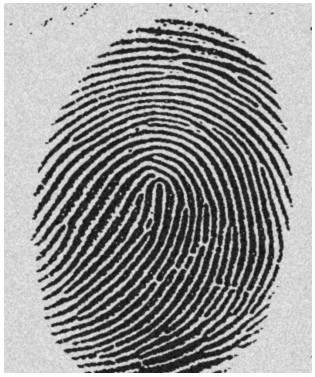

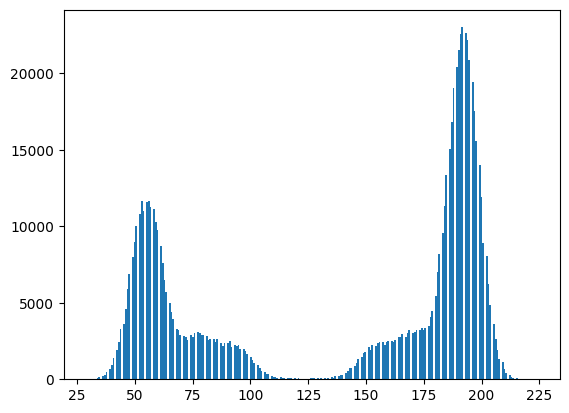

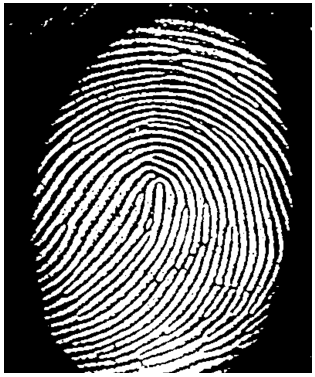

In [7]:
image = io.imread('data/fingerprint.tif', plugin='tifffile')

figure(figsize=(12,12), dpi=40)
imshow(image, cmap='gray')
axis('off')
show()

# nacrtati histogram
plt.hist(image.flatten(), bins=256)
plt.show()

# binarizovati
thr = 125
image_bin = image<125
figure(figsize=(12,12), dpi=40)
imshow(image_bin, vmin=0, vmax=1, cmap='gray')
axis('off')
show()
# morfoloske operacije skimage.morphology

### erozija, dilatacija, otvaranje, zatvaranje

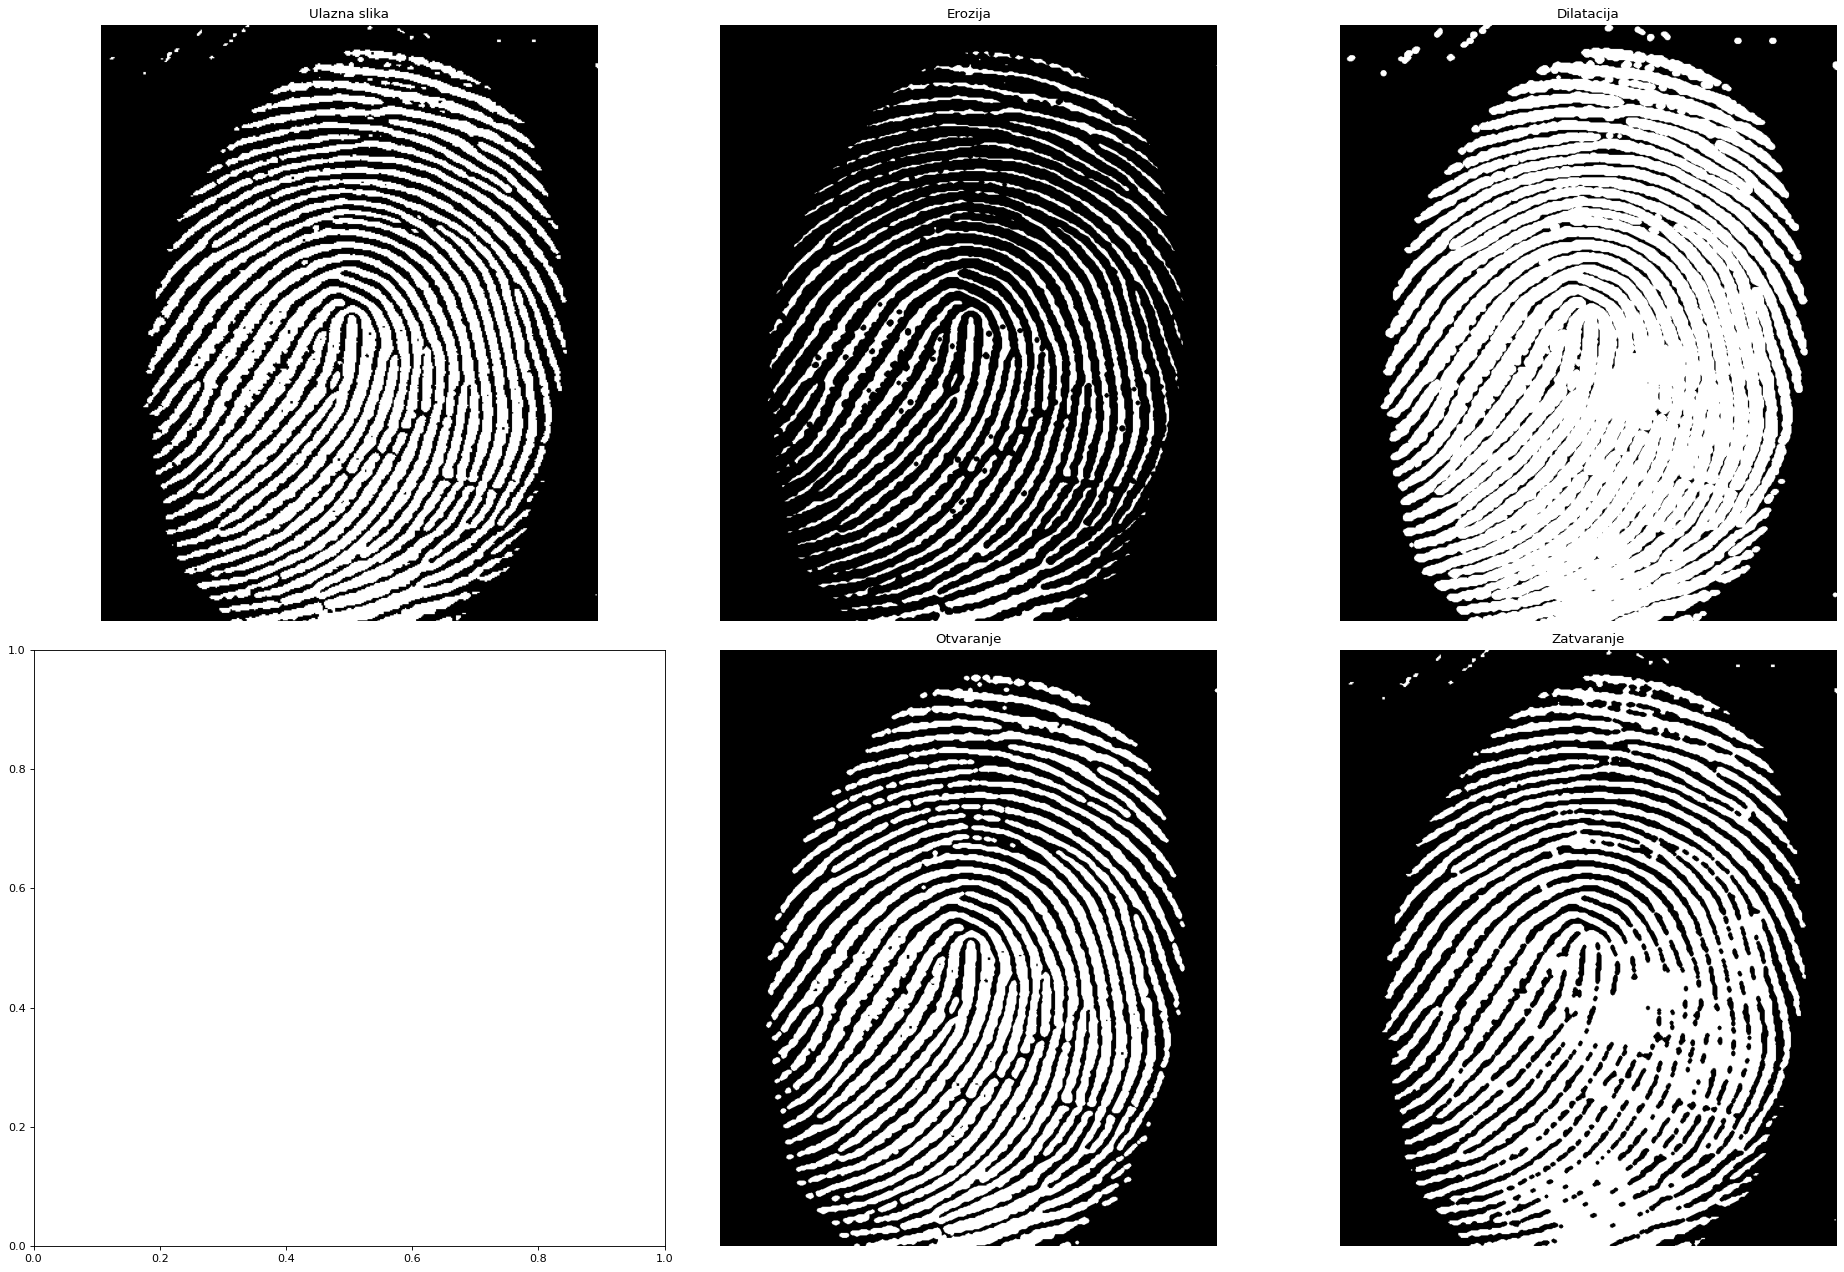

In [8]:
image_erosion = skimage.morphology.erosion(image_bin, skimage.morphology.disk(3))
image_dilation = skimage.morphology.dilation(image_bin, skimage.morphology.disk(3))
image_opening = skimage.morphology.opening(image_bin, skimage.morphology.disk(3))
image_closing = skimage.morphology.closing(image_bin, skimage.morphology.disk(3))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 16), dpi=80)

axes[0,0].imshow(image_bin, cmap='gray')
axes[0,0].set_title('Ulazna slika')
axes[0,0].axis('off')

axes[0,1].imshow(image_erosion, cmap='gray')
axes[0,1].set_title('Erozija')
axes[0,1].axis('off')

axes[0,2].imshow(image_dilation, cmap='gray')
axes[0,2].set_title('Dilatacija')
axes[0,2].axis('off')

axes[1,1].imshow(image_opening, cmap='gray')
axes[1,1].set_title('Otvaranje')
axes[1,1].axis('off')

axes[1,2].imshow(image_closing, cmap='gray')
axes[1,2].set_title('Zatvaranje')
axes[1,2].axis('off')
tight_layout()
plt.show()

### Segmentacija slike - poređenje sa pragom

In [20]:
'''
@brief Funkcija koja na osnovu ulazne slike (tipa float) i datog praga kreira binarizovanu sliku i prikazuje ulaznu sliku, histogram i rezultat binarizacije.
@param image - ulazna slika, opseg [0,1]
@param threshold - prag binarizacije
@retval None
'''
def image_threshold(image, threshold=0.5):
    
    image_thr = image > threshold

    # prikaz slike, histograma i pozicija pragova
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), dpi=80)
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Ulazna slika')
    axes[0].axis('off')

    axes[1].hist(image.flatten(), bins=256, color='b')
    axes[1].set_title('Histogram slike sa \nodgovarajucim pragovima')
    axes[1].axvline(x=threshold, color='r', linestyle='-')
    axes[1].set_facecolor('white')

    axes[2].imshow(image_thr, cmap='gray')
    axes[2].set_title('Binarizovana slika')
    axes[2].axis('off')
    
    tight_layout()
    plt.show()
    
    return

In [21]:
image = io.imread('data/septagon.tif')
if (image.dtype == 'uint8'):
    image = img_as_float(image)
    
interact(image_threshold, image=fixed(image), threshold=(0,1,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

<function __main__.image_threshold(image, threshold=0.5)>

### Mean & Otsu prag - slika bez suma

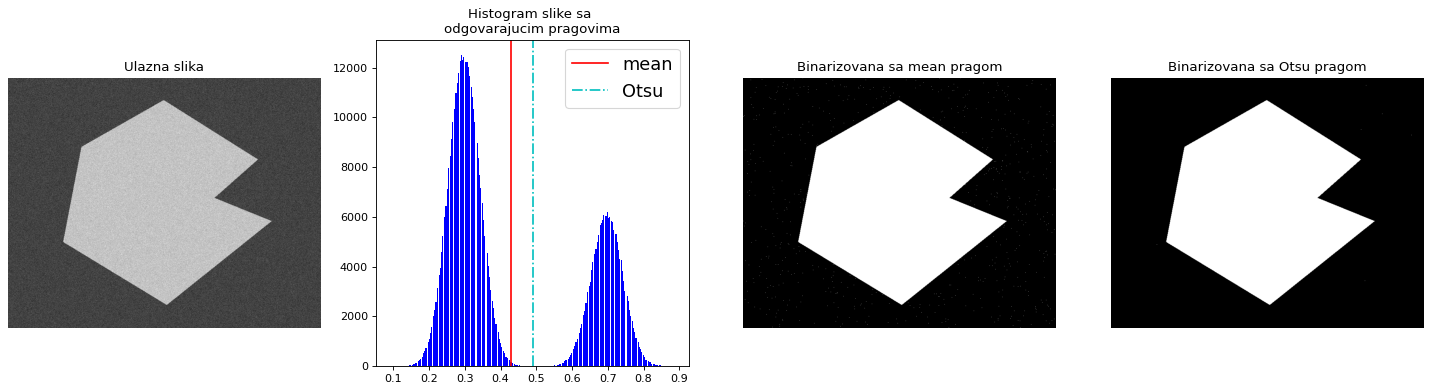

In [11]:
image = io.imread('data/septagon.tif')
if (image.dtype == 'uint8'):
    image = img_as_float(image)

# odredjivanje praga za uspesnu binarizaciju
thresh_mean = skimage.filters.threshold_mean(image.flatten())
thresh_otsu = skimage.filters.threshold_otsu(image.flatten())

image_thr_mean = image > thresh_mean
image_thr_otsu = image > thresh_otsu

# prikaz slike, histograma i pozicija pragova
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), dpi=80)
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Ulazna slika')
axes[0].axis('off')

axes[1].hist(image.flatten(), bins=256, color='b')
axes[1].set_title('Histogram slike sa \nodgovarajucim pragovima')
axes[1].axvline(x=thresh_mean, color='r', linestyle='-')
axes[1].axvline(x=thresh_otsu, color='c', linestyle='dashdot')
axes[1].set_facecolor('white')
axes[1].legend(['mean', 'Otsu'], prop={'size': 16})

axes[2].imshow(image_thr_mean, cmap='gray')
axes[2].set_title('Binarizovana sa mean pragom')
axes[2].axis('off')

axes[3].imshow(image_thr_otsu, cmap='gray')
axes[3].set_title('Binarizovana sa Otsu pragom')
axes[3].axis('off')

tight_layout()
plt.show()

#fig, ax = try_all_threshold(image, figsize=(18, 30), verbose=True)
#plt.show()

### Mean & Otsu prag - zasumljena slika

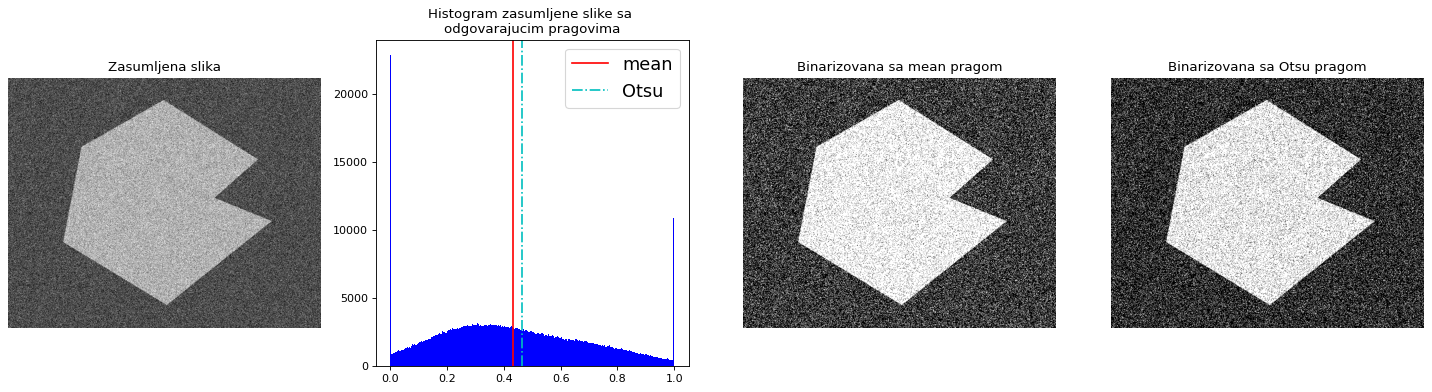

In [12]:
# ucitavanje zasumljene slike
image = io.imread('data/septagon_noisy.tif')
if (image.dtype == 'uint8'):
    image = img_as_float(image)

# odredjivanje praga za uspesnu binarizaciju
thresh_mean = skimage.filters.threshold_mean(image.flatten())
thresh_otsu = skimage.filters.threshold_otsu(image.flatten())

# prikaz slike, histograma i pozicija pragova
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), dpi=80)
axes[0].imshow(image, cmap='gray'), axes[0].set_title('Zasumljena slika'), axes[0].axis('off')
axes[1].hist(image.flatten(), bins=256, color='b'), axes[1].set_title('Histogram zasumljene slike sa \nodgovarajucim pragovima')
axes[1].axvline(x=thresh_mean, color='r', linestyle='-')
axes[1].axvline(x=thresh_otsu, color='c', linestyle='dashdot')
axes[1].set_facecolor('white')
axes[1].legend(['mean', 'Otsu'], prop={'size': 16})
axes[2].imshow(image>thresh_mean, cmap='gray'), axes[2].set_title('Binarizovana sa mean pragom'), axes[2].axis('off')
axes[3].imshow(image>thresh_otsu, cmap='gray'), axes[3].set_title('Binarizovana sa Otsu pragom'), axes[3].axis('off')
tight_layout()
plt.show()


#fig, ax = try_all_threshold(image, figsize=(18, 30), verbose=True)
#plt.show()

### Mean & Otsu - resenje binarizacije zasumljene slike

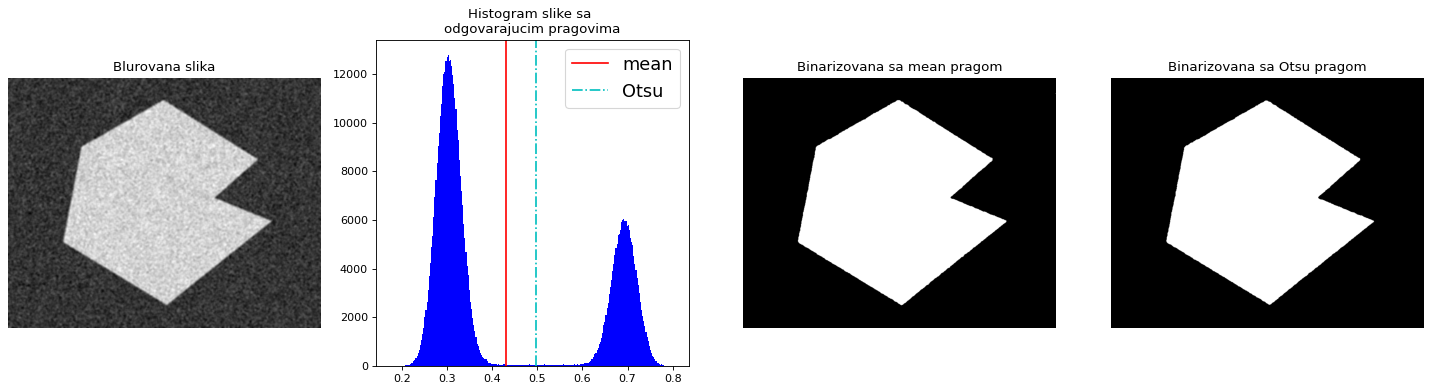

In [13]:
# ucitavanje zasumljene slike
image = io.imread('data/septagon_noisy.tif')
if (image.dtype == 'uint8'):
    image = img_as_float(image)
# filtriranje slike Gausovim filtrom dimenzije 7x7 i standardne devijacije 3
image_blurred = scipy.ndimage.gaussian_filter(image, sigma = 3, truncate=3/3)

# odredjivanje praga za uspesnu binarizaciju
thresh_mean = skimage.filters.threshold_mean(image_blurred.flatten())
thresh_otsu = skimage.filters.threshold_otsu(image_blurred.flatten())

# prikaz slike, histograma i pozicija pragova
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), dpi=80)
axes[0].imshow(image_blurred, cmap='gray'), axes[0].set_title('Blurovana slika'), axes[0].axis('off')
axes[1].hist(image_blurred.flatten(), bins=256, color='b'), axes[1].set_title('Histogram slike sa \nodgovarajucim pragovima')
axes[1].axvline(x=thresh_mean, color='r', linestyle='-')
axes[1].axvline(x=thresh_otsu, color='c', linestyle='dashdot')
axes[1].set_facecolor('white')
axes[1].legend(['mean', 'Otsu'], prop={'size': 16})
axes[2].imshow(image_blurred>thresh_mean, cmap='gray'), axes[2].set_title('Binarizovana sa mean pragom'), axes[2].axis('off')
axes[3].imshow(image_blurred>thresh_otsu, cmap='gray'), axes[3].set_title('Binarizovana sa Otsu pragom'), axes[3].axis('off')
tight_layout()
plt.show()

#fig, ax = try_all_threshold(image_blurred, figsize=(18, 30), verbose=True)
#plt.show()

# Segmentacija u cilju analize slike

### Pristup 1 - binarizacija i regionprops

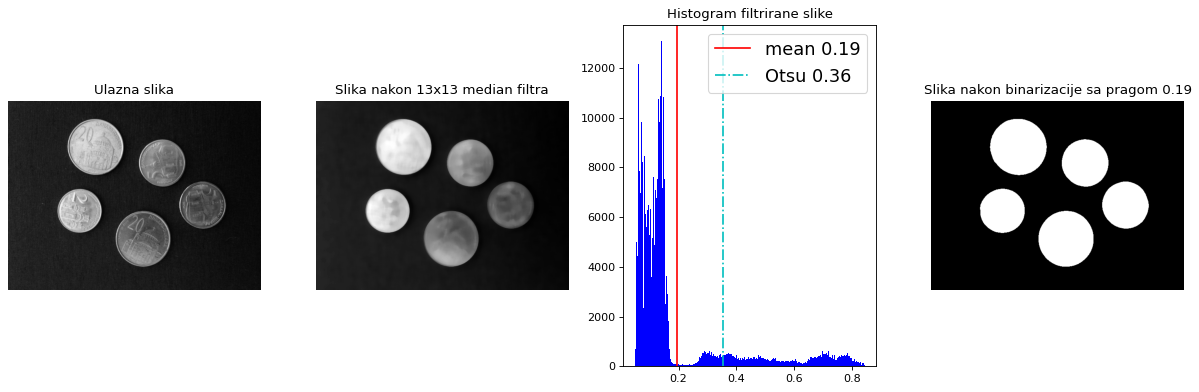

In [15]:
image = skimage.color.rgb2gray(io.imread('data/coins.JPG'))
if (image.dtype == 'uint8'):
    image = img_as_float(image)

    
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), dpi=80)
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Ulazna slika')
axes[0].axis('off')

image_med13x13 = scipy.ndimage.median_filter(image, size=(13,13), mode='reflect')
axes[1].imshow(image_med13x13, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Slika nakon 13x13 median filtra')

thresh_mean = skimage.filters.threshold_mean(image_med13x13.flatten())
thresh_otsu = skimage.filters.threshold_otsu(image_med13x13.flatten())

axes[2].hist(image_med13x13.flatten(), bins=256, color='b')
axes[2].set_title('Histogram filtrirane slike')
axes[2].axvline(x=thresh_mean, color='r', linestyle='-')
axes[2].axvline(x=thresh_otsu, color='c', linestyle='dashdot')
axes[2].set_facecolor('white')
axes[2].legend(['mean '+"{:.2f}".format(thresh_mean), 'Otsu '+"{:.2f}".format(thresh_otsu)], prop={'size': 16})


thresh = 0.19

axes[3].imshow(image_med13x13>thresh, cmap='gray')
axes[3].axis('off')
axes[3].set_title('Slika nakon binarizacije sa pragom '+"{:.2f}".format(thresh_mean))

tight_layout()
plt.show()



objekat 0 ima povrsinu=15927.0 i centar u tacki ((117.98455453004333, 220.734664406354)
objekat 1 ima povrsinu=11048.0 i centar u tacki ((158.5033490224475, 389.5845401882694)
objekat 2 ima povrsinu=10921.0 i centar u tacki ((265.0418459847999, 491.5222049262888)
objekat 3 ima povrsinu=9938.0 i centar u tacki ((279.51056550613805, 180.30398470517207)
objekat 4 ima povrsinu=15478.0 i centar u tacki ((350.20215790153765, 341.2366584830081)


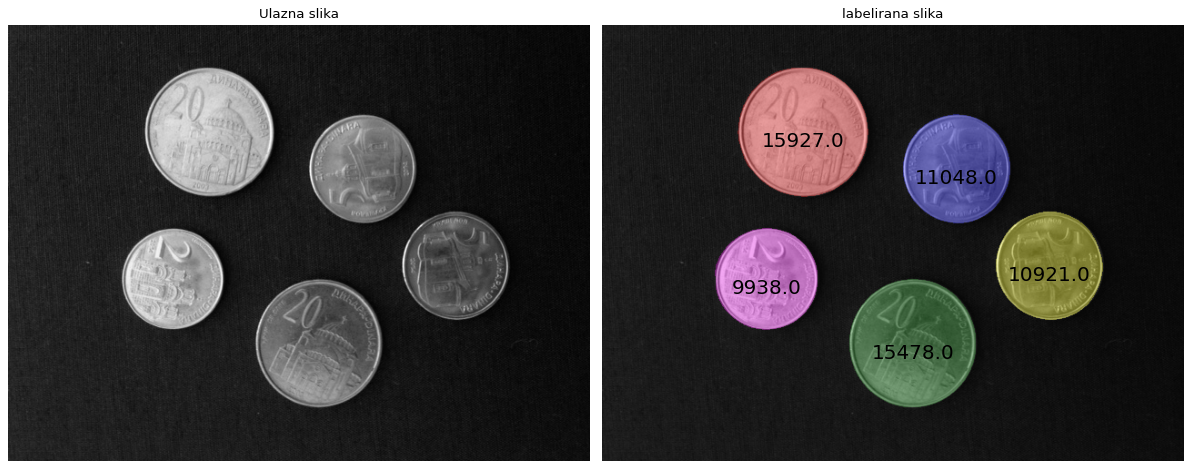

In [16]:
#Odrediti parametre objekata na labeliranoj (objekat - 1, pozadina - 0) slici uz pomoc skimage.measure.regionprops funkcije
# slika mora biti u uint8 formatu kako bi labele bile 1 i 0
image_for_labeling = uint8(image_med13x13>thresh)

# prvo labeliramo sliku tako da svaki objekat koji ne pripada pozadini dobije svoj broj/labelu
labeled_image = skimage.measure.label(image_for_labeling, background=0)
regions = skimage.measure.regionprops(labeled_image)

# Prolazak kroz sve objekte i ispis parametara Area
for i, region in zip(range(len(regions)), regions):
    print("objekat "+str(i)+' ima povrsinu='+str(region['Area'])+' i centar u tacki ('+str(region['Centroid']))
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80)
axes[0].imshow(image, cmap='gray'), axes[0].set_title('Ulazna slika'), axes[0].axis('off')


image_label_overlay = skimage.color.label2rgb(labeled_image, image=image, bg_label=0)
axes[1].imshow(image_label_overlay, cmap='jet'), axes[1].set_title('labelirana slika'), axes[1].axis('off')
for i, region in zip(range(len(regions)), regions):
    axes[1].annotate(text=str(region['Area']), xy=(region['Centroid'][1], region['Centroid'][0]), xytext=(region['Centroid'][1], region['Centroid'][0]),
                    horizontalalignment='center', verticalalignment='top', fontsize=18)

tight_layout()
plt.show()


### Drugaciji pristup - izdvajanje ivica

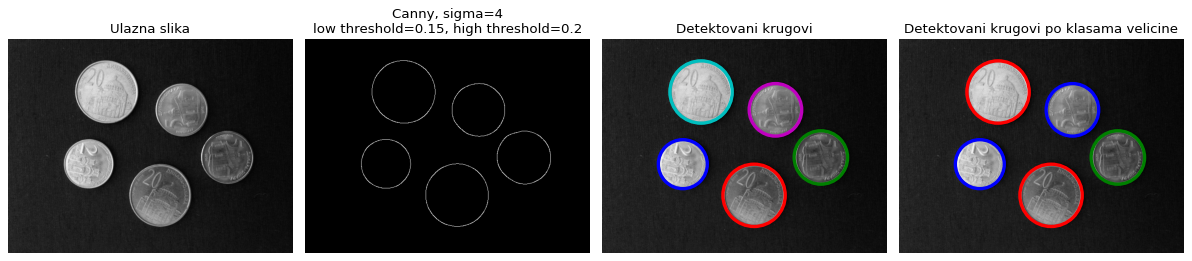

In [17]:
image = skimage.color.rgb2gray(io.imread('data/coins.JPG'))
if (image.dtype == 'uint8'):
    image = img_as_float(image)

#Prikaz originalne slike    
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 8), dpi=80)
axes[0].imshow(image, cmap='gray'), axes[0].set_title('Ulazna slika'), axes[0].axis('off')

# izdvajanje ivica pomoću Canny algoritma
sigma = 4
high_thr = 0.2
low_thr = 0.15
image_canny = skimage.feature.canny(image=image, sigma=sigma, low_threshold=low_thr, high_threshold=high_thr)
axes[1].imshow(image_canny, cmap='gray'), axes[1].set_title('Canny, sigma='+str(sigma)+"\nlow threshold="+str(low_thr)+", high threshold="+str(high_thr)), axes[1].axis('off')

# Detektujemo krugove sa određenim opsegom precnika
hough_radii = np.arange(20, 150)
hough_res = skimage.transform.hough_circle(image=image_canny, radius=hough_radii)

# Biramo 5 najvecih krugova
accums, cx, cy, radii = skimage.transform.hough_circle_peaks(hspaces=hough_res, radii=hough_radii, min_xdistance=10, min_ydistance=10, total_num_peaks=5)

# Crtamo krugove preko originalne slike
axes[2].imshow(image, cmap='gray'), axes[2].set_title('Detektovani krugovi'), axes[2].axis('off')
circle_colors = ['r', 'b', 'm', 'c', 'g']
for center_y, center_x, radius, color in zip(cy, cx, radii, circle_colors):
    circle = plt.Circle((center_x, center_y), radius, color=color, fill=False, linewidth=3)
    axes[2].add_artist(circle)
    

axes[3].imshow(image, cmap='gray'), axes[3].set_title('Detektovani krugovi po klasama velicine'), axes[3].axis('off')
for center_y, center_x, radius in zip(cy, cx, radii):
    if (radius<60):
        color = 'b'
    if (radius>=60)&(radius<70):
        color = 'g'
    if (radius>=70):
        color = 'r'
    circle = plt.Circle((center_x, center_y), radius, color=color, fill=False, linewidth=3)
    axes[3].add_artist(circle)


tight_layout()
plt.show()

